In [1]:
import scipy.io
import tensorly as tl
import time
from tensorly.metrics.regression import RMSE
from tensorly.decomposition._nn_cp import non_negative_parafac_hals, non_negative_parafac
from scipy.misc import face
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
from tensorly.decomposition._cp import initialize_cp
from tensorly.cp_tensor import CPTensor
from tensorly.random import check_random_state, random_cp


#image
image = face()
image = tl.tensor(image, dtype='float')[:100,:100,:]

tensor=tl.tensor(image,dtype='float')
#parameters
init='svd'
svd='numpy_svd'
rank=25

weightsinit, factorsinit = initialize_cp(tensor, rank, init=init, svd=svd,
                                 random_state=None,
                                 normalize_factors=False)

cpinit=CPTensor((weightsinit,factorsinit))

print(tensor.shape)


(100, 100, 3)


# Tensorly Nonnegative Parafac

In [2]:
tic = time.time()
tensornon,errormu = non_negative_parafac(tensor, rank=rank, init=cpinit, tol=10e-8,return_errors=True)
cp_reconstructionnon = tl.cp_to_tensor(tensornon)
time_tensorlynon = time.time()-tic

# Hals in Tensorly

In [3]:
tic = time.time()
tensornon,errorhals = non_negative_parafac_hals(tensor, rank=rank, init=cpinit, tol=10e-8,return_errors=True)
cp_reconstruction_hals = tl.cp_to_tensor(tensornon)
time_tensorlyhals = time.time()-tic

# Comparison

time for tensorly noncp: 0.6973209381103516
time for hals in tensorly: 1.9267687797546387
RMSE tensorly ncp: 13.086929930394167
RMSE Hals in tensorly: 8.484424123799169
SSIM for each channel tensorly ncp: [0.85227917 0.84636123 0.86162555]
SSIM for each channel tensorly hals: [0.94142336 0.93881047 0.94550702]


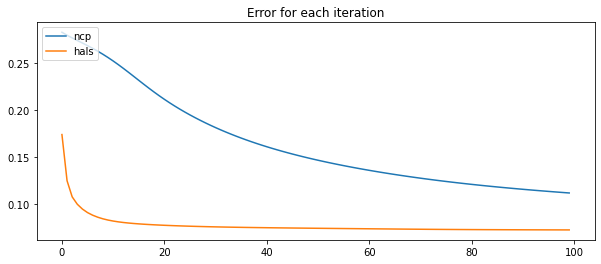

In [4]:
def calculate_error(im1, im2):
    r, c, b = im1.shape
    sim = tl.zeros(b)
    rmse = tl.zeros(b)
    for i in range(b):
        sim[i] = structural_similarity(im1[:, :, i], im2[:, :, i])
        rmse[i] = RMSE(im1[:, :, i], im2[:, :, i])
    return sim, rmse
def error_iteration(b,c):
    fig=plt.figure()
    fig.set_size_inches(10, fig.get_figheight(), forward=True)
    plt.plot(b)
    plt.plot(c)
    plt.title('Error for each iteration')
    plt.legend(['ncp', 'hals'], loc='upper left')
print('time for tensorly noncp:'+' ' +str(time_tensorlynon))
print('time for hals in tensorly:'+' ' +str(time_tensorlyhals))
print('RMSE tensorly ncp:'+' ' +str(RMSE(tensor,cp_reconstructionnon)))
print('RMSE Hals in tensorly:'+' ' +str(RMSE(tensor,cp_reconstruction_hals)))
print('SSIM for each channel tensorly ncp:'+' ' +str(calculate_error(tensor,cp_reconstructionnon)[0]))
print('SSIM for each channel tensorly hals:'+' ' +str(calculate_error(tensor,cp_reconstruction_hals)[0]))
error_iteration(errormu,errorhals)

# Change Backend to Tensorflow

In [5]:
tl.set_backend('tensorflow')
tensor=tl.tensor(image,dtype='float')

# Tensorly Nonnegative Parafac

In [ ]:
tic = time.time()
tensornon,errormu = non_negative_parafac(tensor, rank=rank, init=init, tol=10e-8,return_errors=True)
cp_reconstructionnon = tl.cp_to_tensor(tensornon)
time_tensorlynon = time.time()-tic

# Hals in Tensorly

In [ ]:
tic = time.time()
tensornon,errorhals = non_negative_parafac_hals(tensor, rank=rank, init=init, tol=10e-8,return_errors=True)
cp_reconstruction_hals = tl.cp_to_tensor(tensornon)
time_tensorlyhals = time.time()-tic

# Comparison

In [ ]:
print('time for tensorly noncp:'+' ' +str(time_tensorlynon))
print('time for hals in tensorly:'+' ' +str(time_tensorlyhals))
print('RMSE tensorly ncp:'+' ' +str(RMSE(tensor,cp_reconstructionnon)))
print('RMSE Hals in tensorly:'+' ' +str(RMSE(tensor,cp_reconstruction_hals)))
error_iteration(errormu,errorhals)